<a href="https://colab.research.google.com/github/sakamoto-hands-on/Python_InteractiveComputing_and_Visualization/blob/master/BicycleTrack_Attendance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# モントリオールの自転車トラックの利用者数分析

In [0]:
import numpy as np

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
url = ("https://raw.githubusercontent.com/ipython-books/cookbook-2nd-data/master/bikes.csv")

In [0]:
df = pd.read_csv(url, index_col='Date', parse_dates=True,dayfirst=True)

In [11]:
df.head(2)

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0


In [12]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


## Berri1というトラックと、PierDupというトラックの比較　


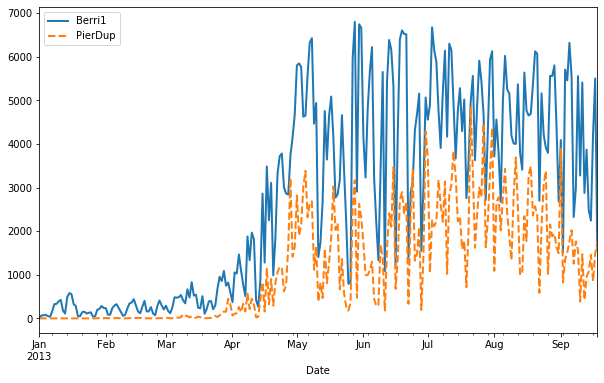

In [15]:
df[['Berri1','PierDup']].plot(figsize=(10,6),style=['-','--'],lw=2)

## 日付のデータから、pandasは簡単に曜日と紐づけられる


In [16]:
df.index.weekday_name

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=261)

In [18]:
df_week = df.groupby(df.index.weekday).sum()
df_week

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
0,106826,51646,68087,129982,69767,44500,119211,72883
1,117244,54656,76974,141217,74299,40679,123533,76559
2,120434,59604,79033,145860,80437,42564,125173,79501
3,115193,52340,76273,141424,73668,36349,120684,74540
4,105701,44252,71605,127526,64385,36850,118556,71426
5,75754,27226,45947,79743,35544,46149,97143,56438
6,74873,29181,40812,75746,37620,53812,100735,53798


## 各曜日ごとに、それぞれのトラックの利用状況を視覚化


(0, 151791.7)

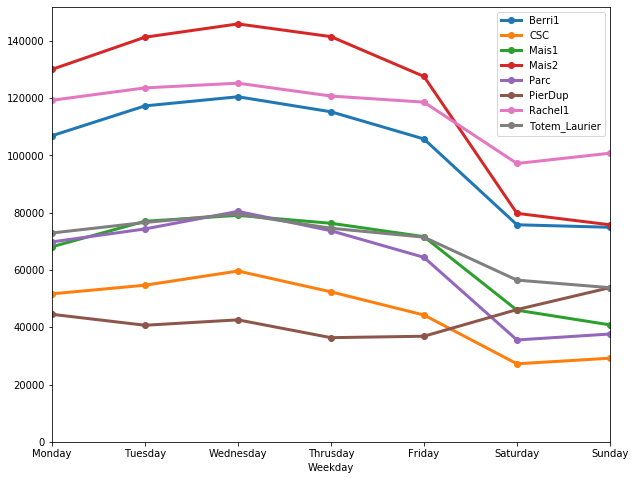

In [21]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
df_week.plot(style='-o',lw=3,ax=ax)
ax.set_xlabel('Weekday')
ax.set_xticklabels(('Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Sunday').split(','))
ax.set_ylim(0)

## スライダーをつけて、ユーザがInteractiveにデータを確認できるようにする


In [0]:
from ipywidgets import interact

In [27]:
@interact
def plot(n=(1,30)):
  fig,ax=plt.subplots(1,1,figsize=(10,8))
  df['Berri1'].rolling(window=n).mean().plot(ax=ax)
  ax.set_ylim(0,7000)
  plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…